In [165]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [166]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [167]:
from sklearn.model_selection import train_test_split

temp_y = data['target']
x = dataset.copy()

y = []

initial = {"cancerous": 0, "not cancerous": 0}
result = {"cancerous": 0, "not cancerous": 0}

for i in range(len(temp_y)):
    y.append(temp_y[i])
    
for i in range(len(y)):
    if y[i] == 0:
        y[i] = "Not Cancerous"
        initial["not cancerous"] += 1
    else:
        y[i] = "Cancerous"
        initial["cancerous"] += 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.45)


In [168]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [169]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [170]:
predictions = clf.predict(X_test)
print(predictions)

for i in range(len(predictions)):
    if predictions[i] == 'Cancerous':
        result["cancerous"] += 1
    else:
        result["not cancerous"] += 1

['Cancerous' 'Not Cancerous' 'Not Cancerous' 'Cancerous' 'Not Cancerous'
 'Cancerous' 'Cancerous' 'Cancerous' 'Not Cancerous' 'Cancerous'
 'Not Cancerous' 'Not Cancerous' 'Cancerous' 'Cancerous' 'Not Cancerous'
 'Cancerous' 'Not Cancerous' 'Cancerous' 'Not Cancerous' 'Not Cancerous'
 'Not Cancerous' 'Cancerous' 'Not Cancerous' 'Cancerous' 'Cancerous'
 'Cancerous' 'Cancerous' 'Cancerous' 'Cancerous' 'Cancerous'
 'Not Cancerous' 'Cancerous' 'Not Cancerous' 'Cancerous' 'Cancerous'
 'Cancerous' 'Cancerous' 'Cancerous' 'Not Cancerous' 'Not Cancerous'
 'Cancerous' 'Cancerous' 'Cancerous' 'Cancerous' 'Cancerous' 'Cancerous'
 'Not Cancerous' 'Cancerous' 'Cancerous' 'Not Cancerous' 'Cancerous'
 'Cancerous' 'Not Cancerous' 'Not Cancerous' 'Cancerous' 'Cancerous'
 'Cancerous' 'Cancerous' 'Not Cancerous' 'Not Cancerous' 'Cancerous'
 'Cancerous' 'Cancerous' 'Not Cancerous' 'Not Cancerous' 'Not Cancerous'
 'Cancerous' 'Cancerous' 'Not Cancerous' 'Cancerous' 'Not Cancerous'
 'Cancerous' 'Not Cancerou

In [171]:
y_test

['Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancerous',
 'Cancerous',
 'Cancerous',
 'Cancerous',
 'Not Cancerous',
 'Not Cancer

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9494163424124513

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Cancerous', 'Not Cancerous'])

array([[151,   7],
       [  6,  93]], dtype=int64)

In [174]:
from sklearn.metrics import precision_score
print('Cancerous Precision: ' + str(precision_score(y_test, predictions, pos_label='Cancerous')))
print('Not Cancerous Precision: ' + str(precision_score(y_test, predictions, pos_label='Not Cancerous')))

Cancerous Precision: 0.9617834394904459
Not Cancerous Precision: 0.93


In [175]:
from sklearn.metrics import recall_score
print('Cancerous Recall Score: ' + str(recall_score(y_test, predictions, pos_label='Cancerous')))
print('Not Cancerous Recall Score: ' + str(recall_score(y_test, predictions, pos_label='Not Cancerous')))

Cancerous Recall Score: 0.9556962025316456
Not Cancerous Recall Score: 0.9393939393939394


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Cancerous', 'Not Cancerous']))

               precision    recall  f1-score   support

    Cancerous       0.96      0.96      0.96       158
Not Cancerous       0.93      0.94      0.93        99

     accuracy                           0.95       257
    macro avg       0.95      0.95      0.95       257
 weighted avg       0.95      0.95      0.95       257



In [177]:
print("initial:")
print(initial)

initial:
{'cancerous': 357, 'not cancerous': 212}


In [178]:
print("result:")
print(result)

result:
{'cancerous': 157, 'not cancerous': 100}


In [179]:
print(len(y_test))

257


In [180]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04296901, 0.05414245, 0.14495132, 0.        ,
       0.        , 0.        , 0.75793722, 0.        , 0.        ])

In [181]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=x.columns).sort_values(0, axis=0, ascending=False)
feature_importances

,0
worst concave points,0.757937
worst area,0.144951
worst perimeter,0.054142
worst texture,0.042969
mean radius,0.000000
mean texture,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000


<AxesSubplot:>

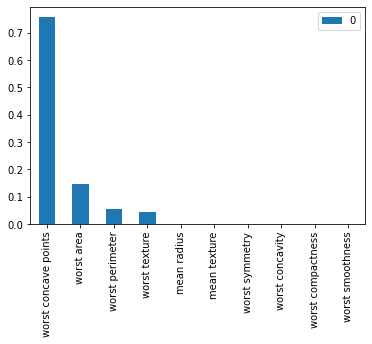

In [182]:
feature_importances.head(10).plot(kind='bar')

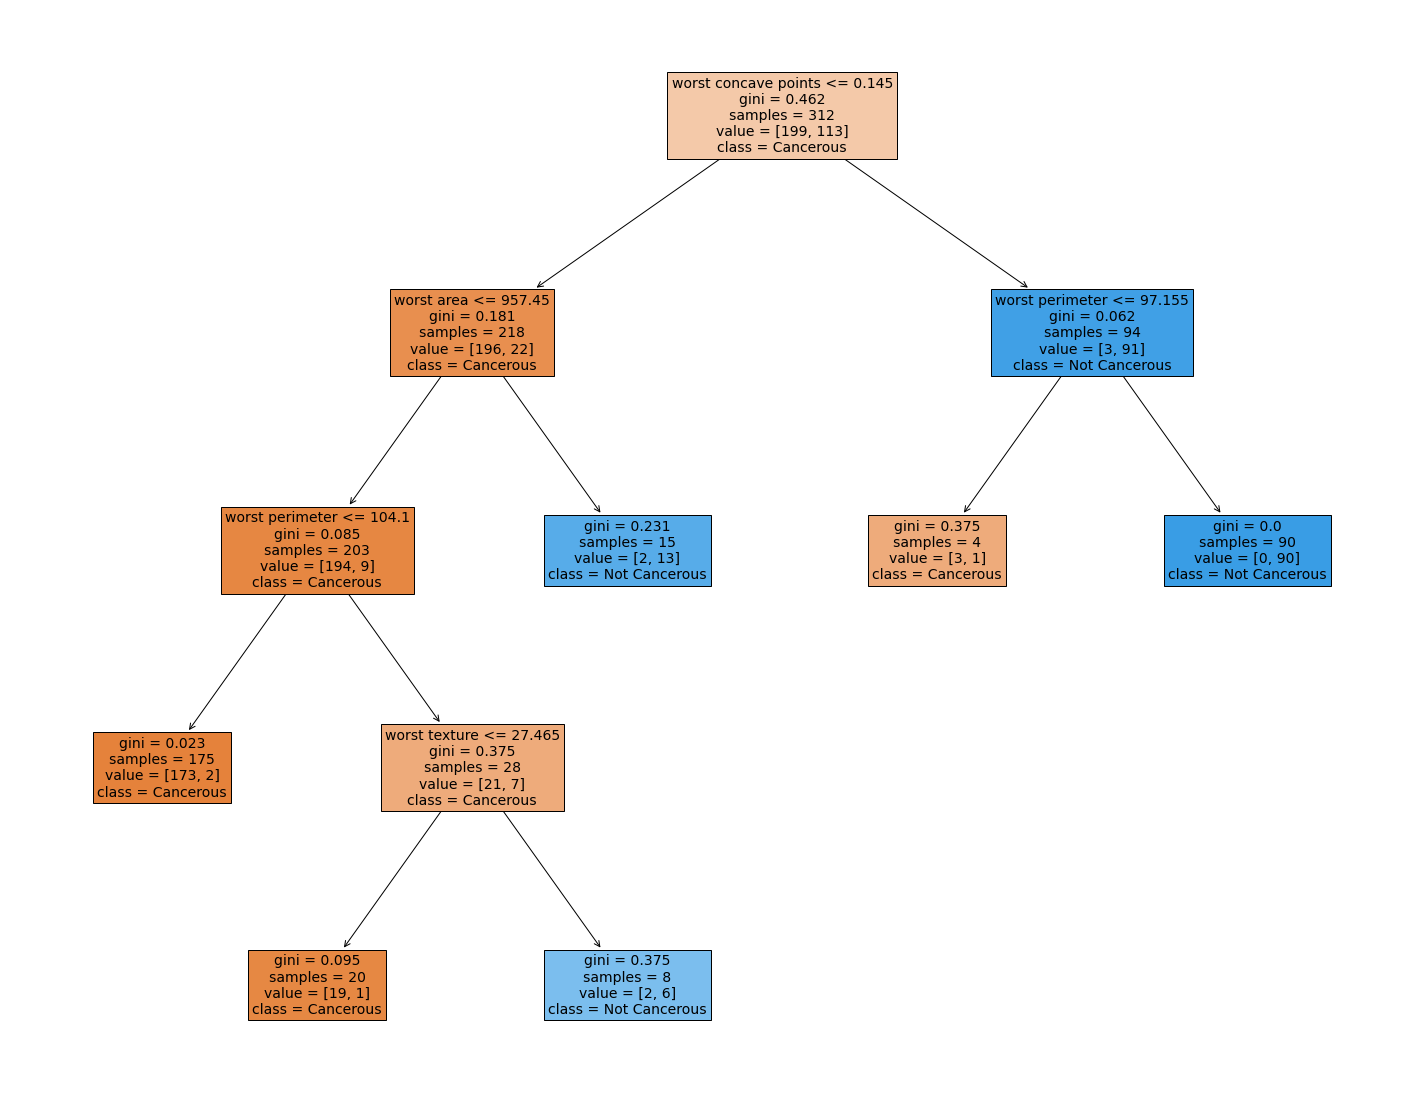

In [183]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                    feature_names=x.columns,
                    class_names={0: "Cancerous", 1: "Not Cancerous"},
                    filled=True,
                    fontsize=14)